In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

UNCLASSIFIED = False
NOISE = -1

# Task I - Density‐based Clustering

In [2]:
def _dist(p,q):
    # compute and return the euclidean distance
    # put your code here
    elu_dis=np.sqrt((p[0]-q[0])**2+(p[1]-q[1])**2)
    return elu_dis
    

In [3]:
#test
a=_dist([5.5,6.6],[14.0,2.5])
a

9.437160589923222

In [4]:
def _eps_neighborhood(p,q,eps):
    # check if the distance between p and q is below eps
    # return True or False
    # put your code here
    if _dist(p,q)<=eps:
        return True 
    else:
        return False

In [5]:
#test
b=_eps_neighborhood([5.5,6.6],[14.0,2.5],9)
print(b)
c=_eps_neighborhood([5.5,6.6],[14.0,2.5],10)
print(c)

False
True


In [6]:
def _region_query(m, point_id, eps):
    n_points = m.shape[1]
    #seeds = []
    #np.random.randint(n_points, size=1)
    p=point_id #core points
    # find and return all points that belong to eps-neighborhood of point_id
    # put your code here
    #找出所有dis < eps 的點存入seeds
    #for i in range(n_points):
        #q=[m[0,i],m[1,i]]
    seeds=[i for i in range(n_points) if _eps_neighborhood(p,[m[0,i],m[1,i]],eps)]
    return seeds

In [7]:
def _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
    # expand the cluster of cluster_id from point_id
    # identify all points belonging to cluster_id
    # update the clustering results in "classification" by assigning cluster_id to each point
    # return True if point_id is a core, False if point_id is not a core
    # write your code below
    #如果seeds>min_points,則要確定其是否都是core points，一直往外畫圈(利用dis<eps)，直到都為border_points，標為同個cluster_id 
    cor_neigh=_region_query(m,point_id,eps) #承接第一次圈到的core points
    if len(cor_neigh) >= min_points:          
        for k in cor_neigh: #cor_neigh的長度是動態的
            new=_region_query(m,[m[0,k],m[1,k]],eps)
            if len(new) >= min_points: 
                for x in range(len(new)): #新擴散的點
                    if new[x] not in cor_neigh:
                        cor_neigh.append(new[x]) #遞迴，cor_neigh會持續擴散
        for m in cor_neigh:
            classifications[m]=cluster_id
        cluster_id+=1
    
    
        
    #以下為debug部分
    #判斷是了讓noise的點不會自成一群，萬一第一核心點為noise，他也會被分配cluster_id並更改classfications的數據
    
    #for m in cor_neigh:
        #classifications[m]=cluster_id
    #cluster_id+=1

   
    
    print(classifications)
    print(cluster_id)
    return classifications,cluster_id



In [8]:
def dbscan(m, eps, min_points):
    """Implementation of DBSCAN
    You can refer to wikipedia for detailed algorithm: https://en.wikipedia.org/wiki/DBSCAN
    Use Euclidean Distance as the measure
    
    Inputs:
    m - A matrix whose columns are feature vectors
    eps - Maximum distance two points can be to be regionally related
    min_points - The minimum number of points to make a cluster
    
    Outputs:
    An array with either a cluster id number or dbscan.NOISE (None) for each column vector in m
    """
    cluster_id = 1
    n_points = m.shape[1]
    classifications = [UNCLASSIFIED] * n_points
    x=classifications
    # the main dbscan algorithm
    # put your code here
    
    ran=int(np.random.randint(n_points, size=1))
    point_id=[m[0,ran],m[1,ran]] #隨機指派一點為core points
    print(point_id)
    x,cluster_id=_expand_cluster(m, x, point_id, cluster_id, eps, min_points)
   
    for n in range (n_points):
        if classifications[n] == False:
            point_id = [m[0,n],m[1,n]] 
            x,cluster_id= _expand_cluster(m,x,point_id,cluster_id,eps,min_points)
            #要將classfications,cluster_id 對同個parameter重複傳入副程式
            
    
    for n in range(len(x)):
        if x[n] == False: 
            x[n] = NOISE
    
    
    
    
    #原本我的想法是想將raw data中已分群的資料刪除，然後再從剩下的點隨機取core_points
    #所以採用classfications一維陣列平行處理，才不會更動到m，導致傳入副程式時出現錯誤
    #以上想法由組員上緣同學提供>.<
    
    
    """
    while temp>0: #清洗資料，重新分群
        m=m.tolist()
        for i in range(len(w)):
            num=w[i]
            m[0][num]=0
            m[1][num]=0
        m[0].remove(0)
        m[1].remove(0)
        print(len(m[0]))
        
        m=np.mat(m)
        ran=int(np.random.randint(n_points, size=1))
        point_id=[m[0,ran],m[1,ran]]
        cluster_id+=1
        x,y,z,w=_expand_cluster(m, classifications, point_id, cluster_id, eps, min_points)
    """
        
    
    return x #經處理後最後得cluster_id or NOISE


In [9]:
# test here
dataset_1 = pd.read_csv('blobs.csv')[:80].values
m = np.asmatrix(dataset_1)
m = m.transpose()

In [10]:
eps = 1.6
min_points = 5
a = dbscan(m, eps, min_points)

[-6.004277622622956, -9.356069823999858]
[False, 1, False, False, False, 1, False, 1, False, False, 1, False, False, False, False, False, False, 1, False, False, False, False, False, 1, False, 1, 1, 1, 1, 1, 1, 1, 1, False, 1, False, False, 1, False, False, False, 1, 1, False, False, 1, 1, False, 1, False, False, False, False, False, 1, 1, False, 1, False, False, False, 1, False, False, 1, False, False, False, False, False, False, False, False, 1, False, False, 1, False, 1, False]
2
[2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, False, False, False, 1, False, False, 2, False, False, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, False, 2, 1, False, False, False, 1, 1, 2, 2, 1, 1, 2, 1, False, False, False, False, False, 1, 1, False, 1, False, 2, 2, 1, 2, 2, 1, False, 2, False, False, False, False, 2, 2, 1, 2, 2, 1, False, 1, 2]
3
[2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 3, 3, 3, 1, 3, 3, 2, 3, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 1, 1, 2, 2, 1, 1, 2, 1, 3, 3, 3, 3, 3, 1, 1, 3, 1

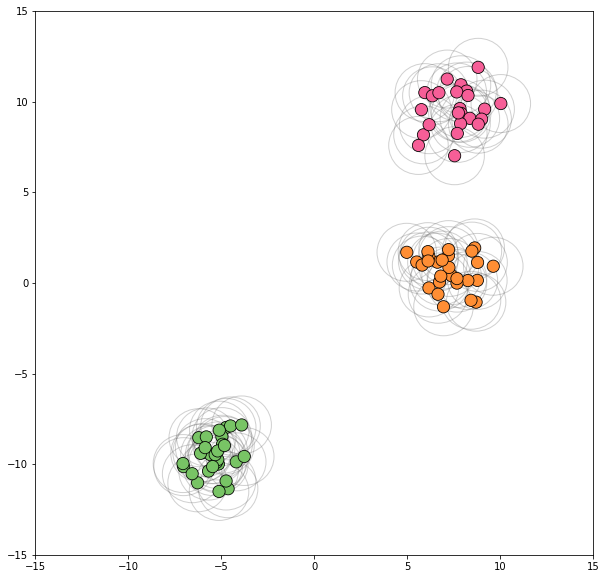

In [11]:
%matplotlib inline
import dbscan_lab_helper as helper

result = np.asarray(a)
helper.plot_clustered_dataset(dataset_1, result, neighborhood=True, epsilon=eps)

In [12]:
dataset_2 = pd.read_csv('varied.csv')[:300].values
m = np.asmatrix(dataset_2)
m = m.transpose()

In [13]:
eps = 1.3
min_points = 5
a = dbscan(m, eps, min_points)

[-9.217604790322953, -5.464759321313161]
[1, 1, False, False, 1, False, False, False, False, False, 1, False, False, False, False, False, 1, 1, 1, False, False, False, 1, 1, 1, 1, 1, False, False, 1, False, 1, 1, 1, False, False, False, 1, False, False, False, False, 1, 1, False, False, 1, 1, False, False, False, 1, False, False, 1, False, 1, 1, False, False, False, False, False, False, False, False, False, False, 1, False, False, False, False, 1, False, False, False, False, False, False, False, False, False, False, False, False, 1, 1, False, False, False, False, False, 1, False, 1, False, False, 1, False, 1, False, False, 1, False, 1, False, 1, False, 1, False, 1, 1, 1, False, False, False, False, False, False, False, 1, 1, 1, False, 1, False, False, 1, False, False, False, 1, False, False, False, False, False, 1, False, False, False, False, False, False, 1, 1, 1, False, False, 1, False, False, False, False, False, False, 1, False, False, False, False, 1, False, False, False, False, F

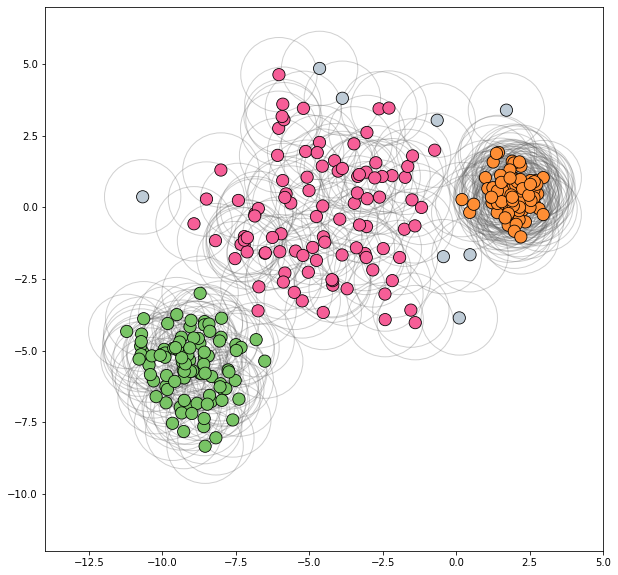

In [14]:
result = np.asarray(a)
helper.plot_clustered_dataset(dataset_2, result, xlim=(-14, 5), ylim=(-12, 7), neighborhood=True, epsilon=eps)


# Task II - K Nearest Neighbor

In [15]:
random.seed(777)
scat_X = np.array(list(random.randint(-1000, 1000) for _ in range(1000)))
scat_Y = np.array(list(random.randint(-1000, 1000) for _ in range(1000)))
# You might need to do some reshape and stack here...

scat_X=scat_X.reshape((1000,1))
scat_Y=scat_Y.reshape((1000,1))
scat_data=np.hstack((scat_X,scat_Y))

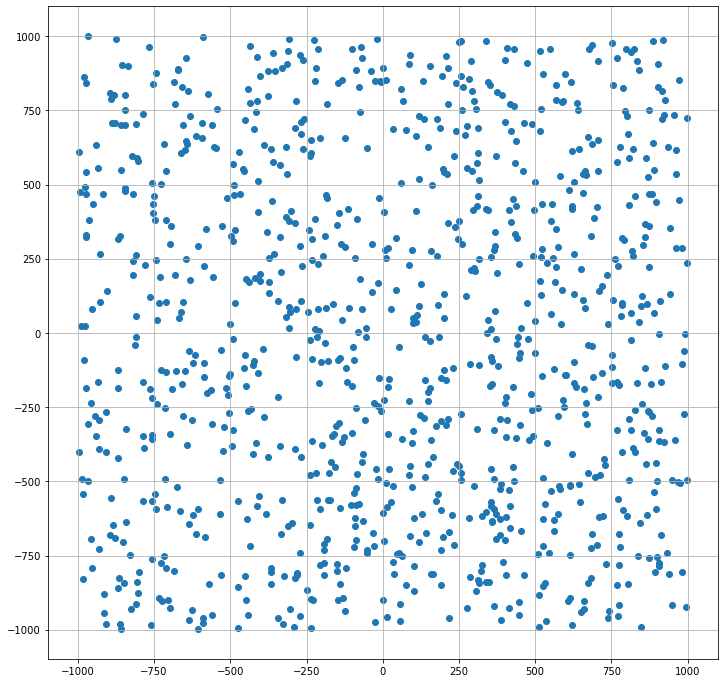

In [16]:
%matplotlib inline
plt.figure(figsize = (12, 12))
plt.scatter(scat_X,scat_Y)    # Put the "X" and "Y" in the scatter plot function...
# How to make the ＂格線＂ of X and Y the same length...? Google might help!
plt.grid()

In [17]:
#test
print(scat_data) 
print(type(scat_data)) #<class 'numpy.ndarray'>
print(scat_data.shape) #(1000, 2)
print(len(scat_data)) #1000
print(scat_data[0]) #[-531 -814]
print(scat_data[0][0]) #-531

list1=[]
list1.append(scat_data[0][0])
list1.append(scat_data[0][1])
print(list1)
list_big=[]
list_big.append(list1)
print(list_big)
list2=[]
list2.append(scat_data[1][0])
list2.append(scat_data[1][1])
print(list2)
list_big.append(list2)
print(list_big)

[[-531 -814]
 [ -87 -697]
 [ -88 -521]
 ...
 [ 786  320]
 [ 678  958]
 [ 926  785]]
<class 'numpy.ndarray'>
(1000, 2)
1000
[-531 -814]
-531
[-531, -814]
[[-531, -814]]
[-87, -697]
[[-531, -814], [-87, -697]]


In [18]:
def radius(ndarray, r):
    boolean_mask = []
    for i in range(len(scat_data)):
        if _dist([ndarray[i][0],ndarray[i][1]],[0,0])<=r:
            temp=[]
            temp.append(ndarray[i][0])
            temp.append(ndarray[i][1])
            boolean_mask.append(temp)
    
    # Check if a point is in the given radius
    
    return boolean_mask

In [19]:
#test
data_list = radius(scat_data, 1000)
data_list
print(len(data_list))

790


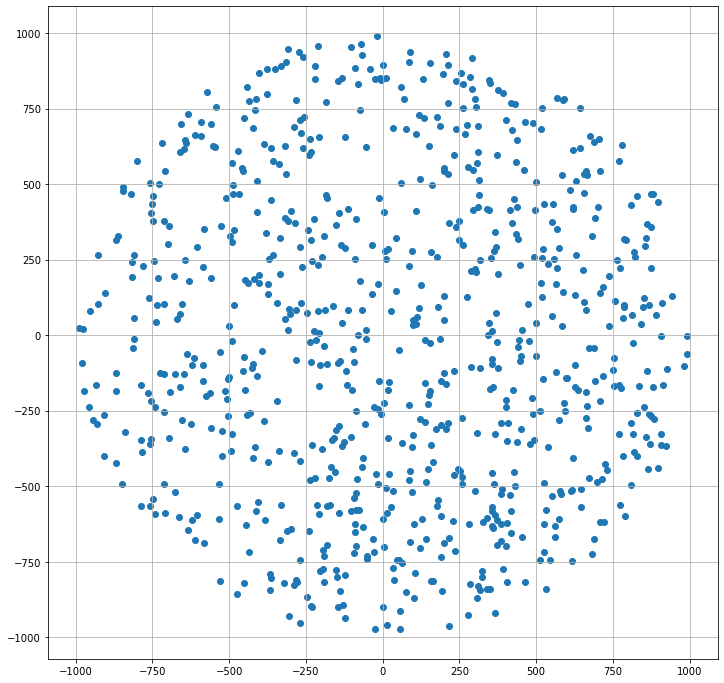

In [20]:
%matplotlib inline
plt.figure(figsize = (12, 12))
plt.grid()
for i in range(len(data_list)):
    plt.scatter(data_list[i][0],data_list[i][1],c="tab:blue")    

# Put the "X" and "Y" in the scatter plot function...
# How to make the ＂格線＂ of X and Y the same length...? Google might help!

In [21]:
#轉換資料型態方便運算
data_array=np.array(data_list)
print(data_array)
print(data_array[0])

[[-531 -814]
 [ -87 -697]
 [ -88 -521]
 ...
 [ 260  751]
 [ -25  848]
 [ 786  320]]
[-531 -814]


In [22]:
# Calculates the distance between each point...
dist_each= np.full((1,len(data_array)),0)
for i in range(len(data_array)):
    dis_for_i=[]
    x=data_array[i][0]
    y=data_array[i][1]
    time=len(data_array)
    for j in range(time):
        temp_dis=_dist([data_array[i][0],data_array[i][1]],[data_array[j][0],data_array[j][1]])
        temp_dis=int(temp_dis**2)
        dis_for_i.append(temp_dis)
    dis_for_i=np.array(dis_for_i)
    dist_each=np.vstack((dist_each,dis_for_i))
    #print(dis_for_i)

dist_sq=np.delete(dist_each,0,axis=0)
print(dist_sq)

                   
        

[[      0  210825  282098 ... 3074906 3018280 3020445]
 [ 210825       0   30977 ... 2217113 2390869 1796418]
 [ 282098   30977       0 ... 1739087 1878129 1471157]
 ...
 [3074906 2217113 1739087 ...       0   90634  462437]
 [3018280 2390869 1878129 ...   90634       0  936504]
 [3020445 1796418 1471157 ...  462437  936504       0]]


In [23]:
#test
x=np.array([0,0])
y=np.array([3,4])
z=np.vstack((x, y))

a = np.empty((2))
#print(a)

n = np.full((1, 7), 0)
print(n)

print(z)
new= np.delete(z,1,axis = 0)
print(new)

[[0 0 0 0 0 0 0]]
[[0 0]
 [3 4]]
[[0 0]]


In [24]:
# Find the nearest neighbor of each point...
nearest = np.argsort(dist_sq,axis=1)

In [25]:
print(nearest)

[[  0  55  29 ... 599 278 614]
 [  1 639 252 ... 505 609 253]
 [  2 676 261 ...  31 609 253]
 ...
 [787 738 643 ...  55 740 618]
 [788 373 557 ... 546 134 535]
 [789 295  19 ... 523 194 629]]


In [26]:
#test
dis_3=nearest[0][1:4]
print(dis_3)
print(data_array[dis_3])

[ 55  29 495]
[[-475 -856]
 [-453 -819]
 [-436 -719]]


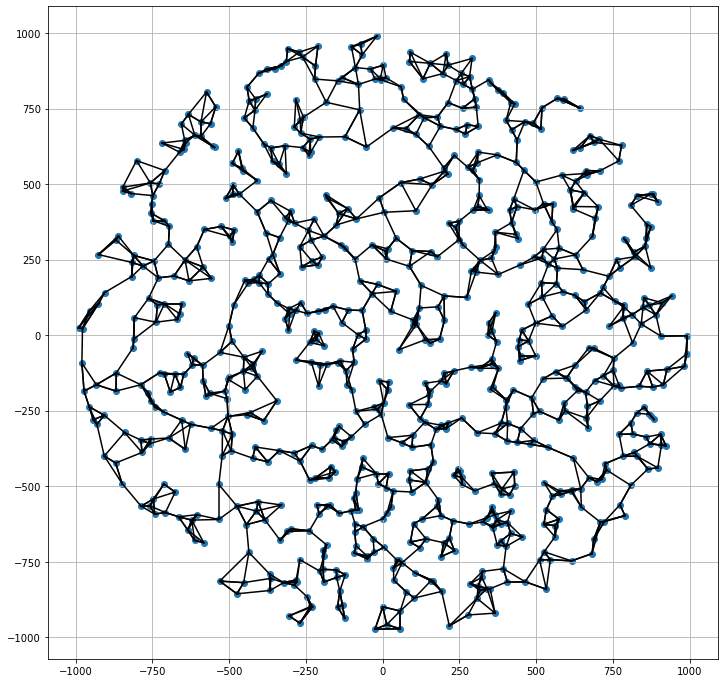

In [27]:
%matplotlib inline
plt.figure(figsize = (12, 12))
plt.grid()
k=3
for i in range(len(data_array)):
    dis_k=nearest[i][1:k+1]
    plot_k=data_array[dis_k] #nearest 3
    plt.scatter(data_array[i][0],data_array[i][1],c="tab:blue")
    for j in range(k):
        plt.plot([data_array[i][0],plot_k[j][0]],[data_array[i][1],plot_k[j][1]],c="k")
             



# Put the "X" and "Y" in the scatter plot function...

# draw lines from each point to its three nearest neighbors
K = 3
# You might need loops to generate the plot below...

# How to make the ＂格線＂ of X and Y the same length...? Google might help!